In [60]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, morphology, measure, color

# Load the binary image
# Replace 'binary_image.png' with the path to your image
image = io.imread('pictures\R.jpeg', as_gray=True)

# Convert the image to binary (True for foreground, False for background)
binary = image > 0.6






(-0.5, 473.5, 630.5, -0.5)

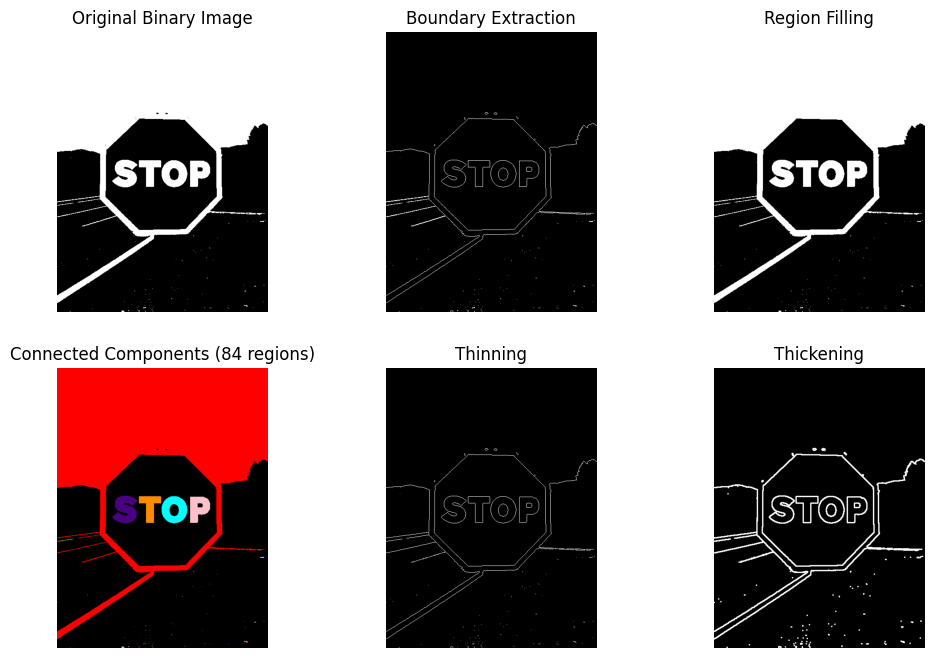

In [62]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
ax = axes.ravel()

# 1. Original Binary Image
ax[0].imshow(binary, cmap='gray')
ax[0].set_title('Original Binary Image')
ax[0].axis('off')

# 2. Boundary Extraction
eroded = morphology.binary_erosion(binary)
boundary = binary & ~eroded 

ax[1].imshow(boundary, cmap='gray')
ax[1].set_title('Boundary Extraction')
ax[1].axis('off')

# 3. Region Filling
filled = morphology.remove_small_holes(binary, area_threshold=32)

ax[2].imshow(filled, cmap='gray')
ax[2].set_title('Region Filling')
ax[2].axis('off')

# 4. Connected Components Extraction
labeled_array, num_features = measure.label(binary, background=0, return_num=True)
colored_labels = color.label2rgb(labeled_array, bg_label=0)

ax[3].imshow(colored_labels)
ax[3].set_title(f'Connected Components ({num_features} regions)')
ax[3].axis('off')

# 5. Thinning
thinned = morphology.thin(boundary)

ax[4].imshow(thinned, cmap='gray')
ax[4].set_title('Thinning')
ax[4].axis('off')

# 6. Thickening
thickened = morphology.binary_dilation(boundary, morphology.square(3))

ax[5].imshow(thickened, cmap='gray')
ax[5].set_title('Thickening')
ax[5].axis('off')